In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json5
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy import stats
from scipy.stats import linregress


In [18]:
# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Output File (CSV)
#output_path="../output_data/cities.csv"
#output_data_df = pd.read_csv(output_path, encoding="utf-8")
#drop rows without value
#output_data_df.dropna(inplace = True) 
#output_data_df



In [6]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [7]:
#GENERATE CITY LISTS
#List to store lat_lngs and cities
lat_lngs= []
cities = []

In [8]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [10]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)




In [11]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [12]:
# Build partial query url
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=4cc76c9fa2675692a7850822b9da30e7&units=imperial&q=


In [11]:
name=[]
country=[]
wind=[]
temp =[]
humidity=[]
lat =[]
lon=[]
clouds=[]
date=[]
for c in cities:
    time.sleep(60)
    try:
        response=requests.get(query_url+c).json()
        country.append(response["sys"]["country"])
        name.append(response["name"])
        wind.append(response["wind"]["speed"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        clouds.append(response["clouds"]["all"])
        date.append(response["dt"])
        print(response)
    except:
        print("city not found" )
        pass




{'coord': {'lon': -69.3632, 'lat': 77.484}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -8.36, 'feels_like': -20.96, 'temp_min': -8.36, 'temp_max': -8.36, 'pressure': 1012, 'humidity': 95, 'sea_level': 1012, 'grnd_level': 1008}, 'visibility': 2064, 'wind': {'speed': 6.8, 'deg': 103, 'gust': 8.79}, 'clouds': {'all': 100}, 'dt': 1644330335, 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -14400, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
city not found
{'coord': {'lon': 153.6833, 'lat': 67.45}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -42.48, 'feels_like': -55.08, 'temp_min': -42.48, 'temp_max': -42.48, 'pressure': 1034, 'humidity': 99, 'sea_level': 1034, 'grnd_level': 1031}, 'visibility': 10000, 'wind': {'speed': 5.14, 'deg': 215, 'gust': 4.94}, 'clouds': {'all': 67}, 'dt': 1644330336, 'sys': {'co

{'coord': {'lon': 153.1, 'lat': -26.5333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.76, 'feels_like': 70.29, 'temp_min': 67.23, 'temp_max': 70.11, 'pressure': 1011, 'humidity': 82}, 'visibility': 10000, 'wind': {'speed': 7.34, 'deg': 151, 'gust': 9.62}, 'clouds': {'all': 0}, 'dt': 1644330339, 'sys': {'type': 2, 'id': 2031008, 'country': 'AU', 'sunrise': 1644348456, 'sunset': 1644395766}, 'timezone': 36000, 'id': 2170581, 'name': 'Coolum Beach', 'cod': 200}
city not found
{'coord': {'lon': 32.0816, 'lat': -10.5414}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 74.19, 'feels_like': 74.75, 'temp_min': 74.19, 'temp_max': 74.19, 'pressure': 1009, 'humidity': 73, 'sea_level': 1009, 'grnd_level': 872}, 'visibility': 10000, 'wind': {'speed': 2.48, 'deg': 281, 'gust': 4.12}, 'rain': {'1h': 0.39}, 'clouds': {'all': 96}, 'dt': 164433033

{'coord': {'lon': 115.3333, 'lat': -33.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.04, 'feels_like': 58.73, 'temp_min': 59.04, 'temp_max': 63.09, 'pressure': 1015, 'humidity': 87, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 8.95, 'deg': 194, 'gust': 13.51}, 'clouds': {'all': 5}, 'dt': 1644330343, 'sys': {'type': 2, 'id': 2020551, 'country': 'AU', 'sunrise': 1644270435, 'sunset': 1644319109}, 'timezone': 28800, 'id': 2075265, 'name': 'Busselton', 'cod': 200}
city not found
{'coord': {'lon': 27.9116, 'lat': -33.0153}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 85.14, 'feels_like': 93.02, 'temp_min': 85.14, 'temp_max': 85.14, 'pressure': 1008, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1644330344, 'sys': {'type': 1, 'id': 1912, 'co

{'coord': {'lon': 30.7861, 'lat': 59.7035}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 31.69, 'feels_like': 28.85, 'temp_min': 30.79, 'temp_max': 33.71, 'pressure': 1002, 'humidity': 96, 'sea_level': 1002, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 225, 'gust': 5.03}, 'clouds': {'all': 100}, 'dt': 1644330348, 'sys': {'type': 2, 'id': 47750, 'country': 'RU', 'sunrise': 1644299575, 'sunset': 1644330553}, 'timezone': 10800, 'id': 546105, 'name': 'Nikolskoye', 'cod': 200}
{'coord': {'lon': 105.15, 'lat': 9.1769}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.78, 'feels_like': 78.78, 'temp_min': 78.78, 'temp_max': 78.78, 'pressure': 1011, 'humidity': 77, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 9.75, 'deg': 88, 'gust': 24.74}, 'clouds': {'all': 18}, 'dt': 164

{'coord': {'lon': -98.75, 'lat': 16.5167}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 72.99, 'feels_like': 73.45, 'temp_min': 72.99, 'temp_max': 72.99, 'pressure': 1015, 'humidity': 74, 'sea_level': 1015, 'grnd_level': 1015}, 'visibility': 10000, 'wind': {'speed': 4.94, 'deg': 52, 'gust': 5.88}, 'clouds': {'all': 1}, 'dt': 1644330353, 'sys': {'country': 'MX', 'sunrise': 1644325426, 'sunset': 1644366882}, 'timezone': -21600, 'id': 3516171, 'name': 'Barra de Tecoanapa', 'cod': 200}
{'coord': {'lon': -62.9967, 'lat': -40.8135}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.14, 'feels_like': 81.23, 'temp_min': 83.14, 'temp_max': 83.14, 'pressure': 1012, 'humidity': 29, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 16.78, 'deg': 312, 'gust': 19.22}, 'clouds': {'all': 100}, 'dt': 1644330353, 'sy

{'coord': {'lon': 95.3222, 'lat': 5.5577}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.52, 'feels_like': 79.52, 'temp_min': 79.52, 'temp_max': 79.52, 'pressure': 1010, 'humidity': 82, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 10.13, 'deg': 83, 'gust': 13.15}, 'clouds': {'all': 58}, 'dt': 1644330358, 'sys': {'country': 'ID', 'sunrise': 1644278128, 'sunset': 1644321021}, 'timezone': 25200, 'id': 1215502, 'name': 'Banda Aceh', 'cod': 200}
{'coord': {'lon': -76.2167, 'lat': -13.7}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 71.65, 'feels_like': 71.94, 'temp_min': 70.02, 'temp_max': 71.65, 'pressure': 1014, 'humidity': 73}, 'visibility': 9000, 'wind': {'speed': 4.61, 'deg': 290}, 'clouds': {'all': 11}, 'dt': 1644330359, 'sys': {'type': 1, 'id': 8691, 'country': 'PE', 'sunrise': 1644318038

{'coord': {'lon': 125.4092, 'lat': -8.9266}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 61.99, 'feels_like': 62.31, 'temp_min': 61.99, 'temp_max': 61.99, 'pressure': 1012, 'humidity': 94, 'sea_level': 1012, 'grnd_level': 857}, 'visibility': 10000, 'wind': {'speed': 1.03, 'deg': 16, 'gust': 1.99}, 'clouds': {'all': 92}, 'dt': 1644330363, 'sys': {'country': 'TL', 'sunrise': 1644269961, 'sunset': 1644314746}, 'timezone': 32400, 'id': 1651810, 'name': 'Airai', 'cod': 200}
{'coord': {'lon': 152.8535, 'lat': -25.2986}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68.04, 'feels_like': 67.78, 'temp_min': 68.04, 'temp_max': 68.11, 'pressure': 1012, 'humidity': 69, 'sea_level': 1012, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 12.84, 'deg': 132, 'gust': 16.91}, 'clouds': {'all': 0}, 'dt': 1644330363, 'sys': {'type': 2

{'coord': {'lon': -35.4608, 'lat': -5.1989}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 88.7, 'feels_like': 93.9, 'temp_min': 88.7, 'temp_max': 88.7, 'pressure': 1011, 'humidity': 54, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 14.03, 'deg': 111, 'gust': 14.65}, 'clouds': {'all': 63}, 'dt': 1644330368, 'sys': {'type': 1, 'id': 8452, 'country': 'BR', 'sunrise': 1644308822, 'sunset': 1644353106}, 'timezone': -10800, 'id': 3386213, 'name': 'Touros', 'cod': 200}
{'coord': {'lon': 32.9833, 'lat': -24.5333}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 91.09, 'feels_like': 90.93, 'temp_min': 91.09, 'temp_max': 91.09, 'pressure': 1008, 'humidity': 36, 'sea_level': 1008, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 12.28, 'deg': 145, 'gust': 11.92}, 'clouds': {'all': 0}, 'dt': 1644330

{'coord': {'lon': 20.2189, 'lat': 69.5763}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 30.2, 'feels_like': 18.25, 'temp_min': 30.2, 'temp_max': 32.09, 'pressure': 985, 'humidity': 83, 'sea_level': 985, 'grnd_level': 985}, 'visibility': 10000, 'wind': {'speed': 17.98, 'deg': 185, 'gust': 22.01}, 'snow': {'1h': 0.13}, 'clouds': {'all': 100}, 'dt': 1644330373, 'sys': {'type': 1, 'id': 1672, 'country': 'NO', 'sunrise': 1644306241, 'sunset': 1644328959}, 'timezone': 3600, 'id': 778829, 'name': 'Lyngseidet', 'cod': 200}
{'coord': {'lon': 136.6319, 'lat': 50.7214}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -3.33, 'feels_like': -11.83, 'temp_min': -3.33, 'temp_max': -3.33, 'pressure': 1025, 'humidity': 96, 'sea_level': 1025, 'grnd_level': 986}, 'visibility': 7606, 'wind': {'speed': 3.53, 'deg': 277, 'gust': 2.84}, 'clouds': {'al

{'coord': {'lon': 10.1725, 'lat': 56.1138}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 46.38, 'feels_like': 40.14, 'temp_min': 44.46, 'temp_max': 47.64, 'pressure': 1013, 'humidity': 69, 'sea_level': 1013, 'grnd_level': 1006}, 'visibility': 10000, 'wind': {'speed': 14.52, 'deg': 288, 'gust': 27.98}, 'clouds': {'all': 32}, 'dt': 1644330378, 'sys': {'type': 2, 'id': 2001568, 'country': 'DK', 'sunrise': 1644303660, 'sunset': 1644336363}, 'timezone': 3600, 'id': 2624652, 'name': 'Holme', 'cod': 200}
{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -39.53, 'feels_like': -52.13, 'temp_min': -39.53, 'temp_max': -39.53, 'pressure': 1033, 'humidity': 100, 'sea_level': 1033, 'grnd_level': 1033}, 'visibility': 10000, 'wind': {'speed': 3.58, 'deg': 168, 'gust': 3.38}, 'clouds': {'all': 85}, '

{'coord': {'lon': -17.1, 'lat': 32.6667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 70.12, 'feels_like': 69.04, 'temp_min': 66.83, 'temp_max': 70.12, 'pressure': 1018, 'humidity': 47, 'sea_level': 1018, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 7.14, 'deg': 89, 'gust': 13.76}, 'clouds': {'all': 0}, 'dt': 1644330382, 'sys': {'type': 2, 'id': 2008291, 'country': 'PT', 'sunrise': 1644307082, 'sunset': 1644346033}, 'timezone': 0, 'id': 2264557, 'name': 'Ponta do Sol', 'cod': 200}
{'coord': {'lon': -169.9187, 'lat': -19.0595}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.29, 'feels_like': 75.02, 'temp_min': 73.29, 'temp_max': 73.29, 'pressure': 1010, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 30}, 'clouds': {'all': 100}, 'dt': 1644330383, 'sys': {'type': 1, 'id': 7306, 'country': 

{'coord': {'lon': -37.6368, 'lat': 65.6145}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 26.76, 'feels_like': 20.59, 'temp_min': 26.76, 'temp_max': 26.76, 'pressure': 989, 'humidity': 71, 'sea_level': 989, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 5.35, 'deg': 349, 'gust': 5.95}, 'clouds': {'all': 100}, 'dt': 1644330388, 'sys': {'type': 1, 'id': 81, 'country': 'GL', 'sunrise': 1644317954, 'sunset': 1644345018}, 'timezone': -10800, 'id': 3424607, 'name': 'Tasiilaq', 'cod': 200}
{'coord': {'lon': 132.75, 'lat': -5.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 83.52, 'feels_like': 91.31, 'temp_min': 83.52, 'temp_max': 83.52, 'pressure': 1009, 'humidity': 76, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 8.61, 'deg': 264, 'gust': 9.64}, 'clouds': {'all': 100}, 'dt': 

{'coord': {'lon': 48.5268, 'lat': 5.3505}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 79.16, 'feels_like': 79.16, 'temp_min': 79.16, 'temp_max': 79.16, 'pressure': 1012, 'humidity': 61, 'sea_level': 1012, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 23.02, 'deg': 49, 'gust': 23.69}, 'clouds': {'all': 5}, 'dt': 1644330393, 'sys': {'country': 'SO', 'sunrise': 1644289345, 'sunset': 1644332267}, 'timezone': 10800, 'id': 57000, 'name': 'Hobyo', 'cod': 200}
city not found
city not found
{'coord': {'lon': -52.1156, 'lat': -21.7633}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.21, 'feels_like': 81.46, 'temp_min': 81.21, 'temp_max': 81.21, 'pressure': 1013, 'humidity': 46, 'sea_level': 1013, 'grnd_level': 978}, 'visibility': 10000, 'wind': {'speed': 2.17, 'deg': 249, 'gust': 1.81}, 'clouds': {'all': 0}, 'dt': 1644330332,

{'coord': {'lon': 28.0706, 'lat': -14.6569}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 74.79, 'feels_like': 75.69, 'temp_min': 74.79, 'temp_max': 74.79, 'pressure': 1008, 'humidity': 79, 'sea_level': 1008, 'grnd_level': 884}, 'visibility': 10000, 'wind': {'speed': 4.05, 'deg': 338, 'gust': 4.5}, 'rain': {'1h': 1.08}, 'clouds': {'all': 26}, 'dt': 1644330398, 'sys': {'country': 'ZM', 'sunrise': 1644292935, 'sunset': 1644338496}, 'timezone': 7200, 'id': 920233, 'name': 'Chibombo', 'cod': 200}
{'coord': {'lon': -27.0667, 'lat': 38.7333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 62.85, 'feels_like': 62.46, 'temp_min': 62.85, 'temp_max': 63.75, 'pressure': 1024, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 7.05, 'deg': 100, 'gust': 6.93}, 'clouds': {'all': 75}, 'dt': 1644330399, 'sys': {'type': 1, 'id': 6895, 'co

{'coord': {'lon': -39.9167, 'lat': -2.9248}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.32, 'feels_like': 87.93, 'temp_min': 83.32, 'temp_max': 83.32, 'pressure': 1011, 'humidity': 66, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 10.13, 'deg': 120, 'gust': 13.87}, 'clouds': {'all': 99}, 'dt': 1644330403, 'sys': {'country': 'BR', 'sunrise': 1644310039, 'sunset': 1644354028}, 'timezone': -10800, 'id': 3393692, 'name': 'Itarema', 'cod': 200}
{'coord': {'lon': -81.1144, 'lat': -5.0892}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.56, 'feels_like': 78.35, 'temp_min': 77.56, 'temp_max': 77.56, 'pressure': 1014, 'humidity': 71, 'sea_level': 1014, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 6.02, 'deg': 137, 'gust': 6.51}, 'clouds': {'all': 100}, 'dt': 1644330404, 'sys

{'coord': {'lon': 167.4833, 'lat': -22.6667}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.29, 'feels_like': 85.8, 'temp_min': 80.29, 'temp_max': 80.29, 'pressure': 997, 'humidity': 86, 'sea_level': 997, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 23.62, 'deg': 127, 'gust': 26.4}, 'clouds': {'all': 95}, 'dt': 1644330409, 'sys': {'country': 'NC', 'sunrise': 1644345309, 'sunset': 1644392008}, 'timezone': 39600, 'id': 2137773, 'name': 'Vao', 'cod': 200}
{'coord': {'lon': 13.3499, 'lat': -3.6819}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 86.27, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1008, 'humidity': 66, 'sea_level': 1008, 'grnd_level': 950}, 'visibility': 10000, 'wind': {'speed': 4.81, 'deg': 232, 'gust': 4.94}, 'rain': {'1h': 0.55}, 'clouds': {'all': 92}, 'dt': 1644330409, 'sys

{'coord': {'lon': -70.2075, 'lat': 8.6226}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 71.64, 'feels_like': 73.2, 'temp_min': 71.64, 'temp_max': 73.09, 'pressure': 1018, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 350}, 'clouds': {'all': 83}, 'dt': 1644330414, 'sys': {'type': 1, 'id': 8707, 'country': 'VE', 'sunrise': 1644318051, 'sunset': 1644360555}, 'timezone': -14400, 'id': 3648546, 'name': 'Barinas', 'cod': 200}
{'coord': {'lon': -105.2, 'lat': 20.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 61.83, 'feels_like': 62.13, 'temp_min': 61.83, 'temp_max': 66.22, 'pressure': 1015, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 30}, 'clouds': {'all': 0}, 'dt': 1644330414, 'sys': {'type': 1, 'id': 7156, 'country': 'MX', 'sunrise': 1644327267, 'sunset': 1644368137}, 'timezone': -2

{'coord': {'lon': 62, 'lat': 34.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 45.52, 'feels_like': 41.95, 'temp_min': 45.52, 'temp_max': 45.52, 'pressure': 1019, 'humidity': 54, 'sea_level': 1019, 'grnd_level': 894}, 'visibility': 10000, 'wind': {'speed': 6.69, 'deg': 299, 'gust': 8.3}, 'clouds': {'all': 5}, 'dt': 1644330419, 'sys': {'country': 'AF', 'sunrise': 1644288276, 'sunset': 1644326869}, 'timezone': 16200, 'id': 1140025, 'name': 'Herat Province', 'cod': 200}
{'coord': {'lon': 22.401, 'lat': -26.0217}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 90.82, 'feels_like': 87.85, 'temp_min': 90.82, 'temp_max': 90.82, 'pressure': 1008, 'humidity': 25, 'sea_level': 1008, 'grnd_level': 906}, 'visibility': 10000, 'wind': {'speed': 4.88, 'deg': 171, 'gust': 3.56}, 'clouds': {'all': 99}, 'dt': 1644330419, 'sys': {'country': 'BW

{'coord': {'lon': 13.5031, 'lat': 68.1214}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 35.56, 'feels_like': 29.84, 'temp_min': 35.49, 'temp_max': 37.08, 'pressure': 982, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 190}, 'clouds': {'all': 40}, 'dt': 1644330425, 'sys': {'type': 1, 'id': 1642, 'country': 'NO', 'sunrise': 1644306946, 'sunset': 1644331478}, 'timezone': 3600, 'id': 3155152, 'name': 'Gravdal', 'cod': 200}
{'coord': {'lon': 129.4833, 'lat': 28.3667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 56.37, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1021, 'humidity': 80, 'sea_level': 1021, 'grnd_level': 993}, 'visibility': 10000, 'wind': {'speed': 14.9, 'deg': 10, 'gust': 18.66}, 'clouds': {'all': 81}, 'dt': 1644330425, 'sys': {'country': 'JP', 'sunrise': 1644271552

{'coord': {'lon': -111.101, 'lat': 30.5838}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 45.55, 'feels_like': 41.65, 'temp_min': 45.55, 'temp_max': 45.55, 'pressure': 1022, 'humidity': 31, 'sea_level': 1022, 'grnd_level': 938}, 'visibility': 10000, 'wind': {'speed': 7.38, 'deg': 60, 'gust': 6.69}, 'clouds': {'all': 0}, 'dt': 1644330430, 'sys': {'country': 'MX', 'sunrise': 1644329449, 'sunset': 1644368788}, 'timezone': -25200, 'id': 3996893, 'name': 'Caborca', 'cod': 200}
city not found
{'coord': {'lon': 66.75, 'lat': 44.1667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 31.96, 'feels_like': 26.15, 'temp_min': 31.96, 'temp_max': 31.96, 'pressure': 1024, 'humidity': 79, 'sea_level': 1024, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 6.04, 'deg': 113, 'gust': 5.91}, 'clouds': {'all': 78}, 'dt': 1644330430, 'sys': 

{'coord': {'lon': 139.5, 'lat': -20.7333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 76.77, 'feels_like': 78.04, 'temp_min': 76.77, 'temp_max': 76.77, 'pressure': 1010, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 0, 'deg': 0}, 'clouds': {'all': 100}, 'dt': 1644330436, 'sys': {'type': 1, 'id': 9495, 'country': 'AU', 'sunrise': 1644352175, 'sunset': 1644398575}, 'timezone': 36000, 'id': 2065594, 'name': 'Mount Isa', 'cod': 200}
{'coord': {'lon': -8.3327, 'lat': 40.1629}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 68.49, 'feels_like': 67.06, 'temp_min': 66.61, 'temp_max': 68.92, 'pressure': 1025, 'humidity': 43, 'sea_level': 1025, 'grnd_level': 1005}, 'visibility': 10000, 'wind': {'speed': 6.44, 'deg': 128, 'gust': 9.89}, 'clouds': {'all': 0}, 'dt': 1644330436, 'sys': {'type': 2, 'id': 2031243, 'country': 'PT', 

{'coord': {'lon': 51.6541, 'lat': 29.6195}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54.91, 'feels_like': 52.09, 'temp_min': 54.91, 'temp_max': 54.91, 'pressure': 1018, 'humidity': 42, 'sea_level': 1018, 'grnd_level': 920}, 'visibility': 10000, 'wind': {'speed': 4.81, 'deg': 271, 'gust': 4.99}, 'clouds': {'all': 0}, 'dt': 1644330441, 'sys': {'country': 'IR', 'sunrise': 1644290326, 'sunset': 1644329785}, 'timezone': 12600, 'id': 128321, 'name': 'Kāzerūn', 'cod': 200}
city not found
{'coord': {'lon': 114.1577, 'lat': 22.2855}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.57, 'feels_like': 60.28, 'temp_min': 57.16, 'temp_max': 61.32, 'pressure': 1021, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 1.01, 'deg': 315, 'gust': 3}, 'clouds': {'all': 100}, 'dt': 1644330288, 'sys': {'type': 2, 'id': 2035800, 'country': 

{'coord': {'lon': 76.1667, 'lat': 24.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.76, 'feels_like': 68.04, 'temp_min': 69.76, 'temp_max': 69.76, 'pressure': 1011, 'humidity': 34, 'sea_level': 1011, 'grnd_level': 973}, 'visibility': 10000, 'wind': {'speed': 4.25, 'deg': 269, 'gust': 5.7}, 'clouds': {'all': 0}, 'dt': 1644330446, 'sys': {'country': 'IN', 'sunrise': 1644284040, 'sunset': 1644324305}, 'timezone': 19800, 'id': 1269020, 'name': 'Jhālrapātan', 'cod': 200}
{'coord': {'lon': -83.4327, 'lat': 45.0617}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 22.01, 'feels_like': 22.01, 'temp_min': 17.74, 'temp_max': 23.11, 'pressure': 1015, 'humidity': 86}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 256, 'gust': 3}, 'clouds': {'all': 100}, 'dt': 1644330446, 'sys': {'type': 2, 'id': 2041433, 'country': 'US', 'sunris

{'coord': {'lon': 87.7333, 'lat': 50.3}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -13.18, 'feels_like': -21.89, 'temp_min': -13.18, 'temp_max': -13.18, 'pressure': 1039, 'humidity': 84, 'sea_level': 1039, 'grnd_level': 778}, 'visibility': 10000, 'wind': {'speed': 3.04, 'deg': 164, 'gust': 4.07}, 'clouds': {'all': 16}, 'dt': 1644330450, 'sys': {'country': 'RU', 'sunrise': 1644284002, 'sunset': 1644318790}, 'timezone': 25200, 'id': 1511997, 'name': 'Aktash', 'cod': 200}
{'coord': {'lon': 139.8, 'lat': 36.3}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 41.77, 'feels_like': 38.34, 'temp_min': 33.69, 'temp_max': 46.58, 'pressure': 1023, 'humidity': 63, 'sea_level': 1023, 'grnd_level': 1018}, 'visibility': 10000, 'wind': {'speed': 5.3, 'deg': 30, 'gust': 11.21}, 'clouds': {'all': 93}, 'dt': 1644330451, 'sys': {'type': 2, 'id

{'coord': {'lon': 40.8647, 'lat': 61.095}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 24.67, 'feels_like': 17.06, 'temp_min': 24.67, 'temp_max': 24.67, 'pressure': 1005, 'humidity': 96, 'sea_level': 1005, 'grnd_level': 988}, 'visibility': 921, 'wind': {'speed': 6.51, 'deg': 152, 'gust': 20.87}, 'clouds': {'all': 100}, 'dt': 1644330455, 'sys': {'country': 'RU', 'sunrise': 1644297551, 'sunset': 1644327739}, 'timezone': 10800, 'id': 507899, 'name': 'Podyuga', 'cod': 200}
{'coord': {'lon': -51.1908, 'lat': -19.6772}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 81.63, 'feels_like': 85.35, 'temp_min': 81.63, 'temp_max': 81.63, 'pressure': 1012, 'humidity': 68, 'sea_level': 1012, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 3.15, 'deg': 203, 'gust': 2.57}, 'clouds': {'all': 67}, 'dt': 1644330456, 'sys': {'count

{'coord': {'lon': 135.3667, 'lat': 33.7333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 43.93, 'feels_like': 41.86, 'temp_min': 43.93, 'temp_max': 43.93, 'pressure': 1022, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 4, 'deg': 19, 'gust': 8.01}, 'clouds': {'all': 65}, 'dt': 1644330461, 'sys': {'type': 2, 'id': 2039984, 'country': 'JP', 'sunrise': 1644270607, 'sunset': 1644309320}, 'timezone': 32400, 'id': 1850708, 'name': 'Tanabe', 'cod': 200}
{'coord': {'lon': 54.0924, 'lat': 17.0151}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.69, 'feels_like': 78.67, 'temp_min': 80.69, 'temp_max': 80.69, 'pressure': 1016, 'humidity': 12}, 'visibility': 10000, 'wind': {'speed': 17.27, 'deg': 330}, 'clouds': {'all': 0}, 'dt': 1644330461, 'sys': {'type': 1, 'id': 7562, 'country': 'OM', 'sunrise': 1644288787, 'sunset': 16443301

{'coord': {'lon': 124.284, 'lat': -9.8607}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.45, 'feels_like': 69.37, 'temp_min': 68.45, 'temp_max': 68.45, 'pressure': 1011, 'humidity': 93, 'sea_level': 1011, 'grnd_level': 917}, 'visibility': 10000, 'wind': {'speed': 3.04, 'deg': 322, 'gust': 3.15}, 'clouds': {'all': 100}, 'dt': 1644330467, 'sys': {'country': 'ID', 'sunrise': 1644270168, 'sunset': 1644315079}, 'timezone': 28800, 'id': 1626703, 'name': 'Soe', 'cod': 200}
{'coord': {'lon': 29.6581, 'lat': -4.83}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 75.78, 'feels_like': 76.68, 'temp_min': 75.78, 'temp_max': 75.78, 'pressure': 1008, 'humidity': 77, 'sea_level': 1008, 'grnd_level': 913}, 'visibility': 10000, 'wind': {'speed': 3.4, 'deg': 181, 'gust': 3.69}, 'rain': {'1h': 0.59}, 'clouds': {'all': 92}, 'dt': 1644330467, 'sy

{'coord': {'lon': -8.9864, 'lat': 52.8436}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 49.93, 'feels_like': 45.82, 'temp_min': 49.93, 'temp_max': 54.07, 'pressure': 1021, 'humidity': 100}, 'visibility': 5000, 'wind': {'speed': 10.36, 'deg': 230}, 'clouds': {'all': 75}, 'dt': 1644330472, 'sys': {'type': 1, 'id': 1569, 'country': 'IE', 'sunrise': 1644307615, 'sunset': 1644341605}, 'timezone': 0, 'id': 2964405, 'name': 'Ennis', 'cod': 200}
{'coord': {'lon': 156.125, 'lat': 50.6789}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 28.17, 'feels_like': 23.77, 'temp_min': 28.17, 'temp_max': 28.17, 'pressure': 1012, 'humidity': 96, 'sea_level': 1012, 'grnd_level': 1012}, 'visibility': 204, 'wind': {'speed': 3.89, 'deg': 97, 'gust': 11.23}, 'snow': {'1h': 0.34}, 'clouds': {'all': 91}, 'dt': 1644330472, 'sys': {'country': 'RU'

{'coord': {'lon': 20.3667, 'lat': 48.05}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 41.86, 'feels_like': 36.16, 'temp_min': 41.86, 'temp_max': 41.86, 'pressure': 1024, 'humidity': 57, 'sea_level': 1024, 'grnd_level': 976}, 'visibility': 10000, 'wind': {'speed': 9.53, 'deg': 283, 'gust': 17.45}, 'clouds': {'all': 85}, 'dt': 1644330477, 'sys': {'type': 2, 'id': 2043516, 'country': 'HU', 'sunrise': 1644299812, 'sunset': 1644335317}, 'timezone': 3600, 'id': 722424, 'name': 'Bélapátfalva', 'cod': 200}
{'coord': {'lon': -55.3482, 'lat': 49.1499}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 30.9, 'feels_like': 22.96, 'temp_min': 29.32, 'temp_max': 30.9, 'pressure': 1032, 'humidity': 92, 'sea_level': 1032, 'grnd_level': 1029}, 'visibility': 10000, 'wind': {'speed': 8.9, 'deg': 179, 'gust': 23.6}, 'clouds': {'all': 100}, 'd

{'coord': {'lon': 39.1353, 'lat': 58.4993}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 32.58, 'feels_like': 25.3, 'temp_min': 32.58, 'temp_max': 32.58, 'pressure': 1005, 'humidity': 93, 'sea_level': 1005, 'grnd_level': 991}, 'visibility': 7157, 'wind': {'speed': 8.41, 'deg': 165, 'gust': 19.37}, 'snow': {'1h': 0.19}, 'clouds': {'all': 100}, 'dt': 1644330482, 'sys': {'country': 'RU', 'sunrise': 1644297266, 'sunset': 1644328855}, 'timezone': 10800, 'id': 506029, 'name': "Poshekhon'ye", 'cod': 200}
{'coord': {'lon': -121.9166, 'lat': 36.6177}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 49.32, 'feels_like': 46.4, 'temp_min': 36, 'temp_max': 55.17, 'pressure': 1024, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1644330313, 'sys': {'type': 2, 'id': 2008282, 'country': 'US', 'sun

{'coord': {'lon': 7.2404, 'lat': 61.1845}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 36.09, 'feels_like': 29.17, 'temp_min': 36.09, 'temp_max': 36.1, 'pressure': 1000, 'humidity': 93}, 'visibility': 600, 'wind': {'speed': 9.22, 'deg': 230}, 'clouds': {'all': 100}, 'dt': 1644330487, 'sys': {'type': 1, 'id': 1665, 'country': 'NO', 'sunrise': 1644305632, 'sunset': 1644335798}, 'timezone': 3600, 'id': 7288345, 'name': 'Kaupanger', 'cod': 200}
{'coord': {'lon': 82.8265, 'lat': 58.3631}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -12.24, 'feels_like': -24.84, 'temp_min': -12.24, 'temp_max': -12.24, 'pressure': 1040, 'humidity': 99, 'sea_level': 1040, 'grnd_level': 1031}, 'visibility': 10000, 'wind': {'speed': 5.37, 'deg': 60, 'gust': 11.86}, 'clouds': {'all': 14}, 'dt': 1644330488, 'sys': {'country': 'RU', 'sunrise': 1644286763, 'sunset': 

{'coord': {'lon': 113.5678, 'lat': 22.2769}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 58.12, 'feels_like': 57.25, 'temp_min': 56.91, 'temp_max': 61.05, 'pressure': 1020, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 350}, 'clouds': {'all': 40}, 'dt': 1644330493, 'sys': {'type': 1, 'id': 9204, 'country': 'CN', 'sunrise': 1644274895, 'sunset': 1644315496}, 'timezone': 28800, 'id': 1790437, 'name': 'Zhuhai', 'cod': 200}
{'coord': {'lon': -122.3534, 'lat': 45.5826}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 37.53, 'feels_like': 35.04, 'temp_min': 32.76, 'temp_max': 41.65, 'pressure': 1035, 'humidity': 96}, 'visibility': 805, 'wind': {'speed': 3.44, 'deg': 10}, 'clouds': {'all': 100}, 'dt': 1644330493, 'sys': {'type': 1, 'id': 6070, 'country': 'US', 'sunrise': 1644333695, 'sunset': 1644369943}, 'timezone': 

{'coord': {'lon': 135.9833, 'lat': 33.7333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 43.92, 'feels_like': 40.48, 'temp_min': 43.92, 'temp_max': 43.92, 'pressure': 1023, 'humidity': 88, 'sea_level': 1023, 'grnd_level': 1022}, 'visibility': 10000, 'wind': {'speed': 5.91, 'deg': 335, 'gust': 6.87}, 'clouds': {'all': 92}, 'dt': 1644330498, 'sys': {'type': 2, 'id': 2039984, 'country': 'JP', 'sunrise': 1644270459, 'sunset': 1644309172}, 'timezone': 32400, 'id': 1847947, 'name': 'Shingū', 'cod': 200}
{'coord': {'lon': -97.0667, 'lat': 15.85}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 74.44, 'feels_like': 75.25, 'temp_min': 74.44, 'temp_max': 74.44, 'pressure': 1016, 'humidity': 78, 'sea_level': 1016, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 4.29, 'deg': 42, 'gust': 4.38}, 'clouds': {'all': 5}, 'dt': 164433

{'coord': {'lon': -46.1056, 'lat': -15.9169}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 75.87, 'feels_like': 76.62, 'temp_min': 75.87, 'temp_max': 75.87, 'pressure': 1013, 'humidity': 74, 'sea_level': 1013, 'grnd_level': 956}, 'visibility': 10000, 'wind': {'speed': 2.75, 'deg': 228, 'gust': 3.29}, 'rain': {'1h': 0.62}, 'clouds': {'all': 99}, 'dt': 1644330503, 'sys': {'country': 'BR', 'sunrise': 1644310654, 'sunset': 1644356383}, 'timezone': -10800, 'id': 3471522, 'name': 'Arinos', 'cod': 200}
{'coord': {'lon': -7.1664, 'lat': 62.1564}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}, {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 32.92, 'feels_like': 20.32, 'temp_min': 32.92, 'temp_max': 32.92, 'pressure': 992, 'humidity': 80}, 'visibility': 3500, 'wind': {'speed': 28.77, 'deg': 260, 'gust': 52.93}, 'snow': {'1h':

{'coord': {'lon': 106.9816, 'lat': 13.4878}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 81.95, 'feels_like': 84.36, 'temp_min': 81.95, 'temp_max': 81.95, 'pressure': 1011, 'humidity': 60, 'sea_level': 1011, 'grnd_level': 1000}, 'visibility': 10000, 'wind': {'speed': 9.6, 'deg': 98, 'gust': 23.44}, 'clouds': {'all': 25}, 'dt': 1644330509, 'sys': {'country': 'KH', 'sunrise': 1644275854, 'sunset': 1644317699}, 'timezone': 25200, 'id': 1830377, 'name': 'Lumphat', 'cod': 200}
{'coord': {'lon': 98.9394, 'lat': 18.5262}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 70.02, 'feels_like': 68.07, 'temp_min': 70, 'temp_max': 77.13, 'pressure': 1011, 'humidity': 29, 'sea_level': 1011, 'grnd_level': 977}, 'visibility': 10000, 'wind': {'speed': 1.81, 'deg': 258, 'gust': 2.57}, 'clouds': {'all': 27}, 'dt': 1644330509, 'sys': {'typ

{'coord': {'lon': 11.3842, 'lat': 62.5747}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 30.04, 'feels_like': 21.11, 'temp_min': 30.04, 'temp_max': 30.04, 'pressure': 994, 'humidity': 59}, 'visibility': 10000, 'wind': {'speed': 10.36, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1644330514, 'sys': {'type': 1, 'id': 1655, 'country': 'NO', 'sunrise': 1644305074, 'sunset': 1644334368}, 'timezone': 3600, 'id': 3141332, 'name': 'Røros', 'cod': 200}
{'coord': {'lon': 58.5334, 'lat': 22.6906}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.42, 'feels_like': 71.55, 'temp_min': 73.42, 'temp_max': 73.42, 'pressure': 1014, 'humidity': 23, 'sea_level': 1014, 'grnd_level': 963}, 'visibility': 10000, 'wind': {'speed': 3.27, 'deg': 311, 'gust': 10.16}, 'clouds': {'all': 0}, 'dt': 1644330514, 'sys': {'country': 'OM', 'sunrise': 1644288130, 'sunset': 1

{'coord': {'lon': 143.2326, 'lat': 51.7102}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 12.88, 'feels_like': 0.28, 'temp_min': 12.88, 'temp_max': 12.88, 'pressure': 1014, 'humidity': 94, 'sea_level': 1014, 'grnd_level': 1010}, 'visibility': 134, 'wind': {'speed': 16.42, 'deg': 291, 'gust': 30.47}, 'snow': {'1h': 0.76}, 'clouds': {'all': 100}, 'dt': 1644330519, 'sys': {'country': 'RU', 'sunrise': 1644357225, 'sunset': 1644391733}, 'timezone': 39600, 'id': 2122783, 'name': 'Katangli', 'cod': 200}
{'coord': {'lon': 2.4386, 'lat': 11.2985}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 96.78, 'feels_like': 91.63, 'temp_min': 96.78, 'temp_max': 96.78, 'pressure': 1009, 'humidity': 7, 'sea_level': 1009, 'grnd_level': 974}, 'visibility': 10000, 'wind': {'speed': 6.49, 'deg': 53, 'gust': 7.96}, 'clouds': {'all': 8}, 'dt': 1644330519, 'sys': {'co

{'coord': {'lon': -57.7186, 'lat': -3.3836}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.48, 'feels_like': 89.98, 'temp_min': 83.48, 'temp_max': 83.48, 'pressure': 1011, 'humidity': 72, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 3.87, 'deg': 55, 'gust': 8.46}, 'clouds': {'all': 100}, 'dt': 1644330524, 'sys': {'country': 'BR', 'sunrise': 1644314282, 'sunset': 1644358330}, 'timezone': -14400, 'id': 3395062, 'name': 'Maués', 'cod': 200}
{'coord': {'lon': -173.9833, 'lat': -18.65}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.88, 'feels_like': 77.59, 'temp_min': 75.88, 'temp_max': 75.88, 'pressure': 1009, 'humidity': 94}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 10}, 'clouds': {'all': 100}, 'dt': 1644330524, 'sys': {'type': 1, 'id': 7292, 'country': 'TO', 'sunrise': 1644427590

In [12]:
weather_dict = {
    "City":name,
    "Country":country,
    "lat":lat,
    "lon":lon,
    "Max Temp":temp,
    "Humidity":humidity,
    "Cloudiness":clouds,
    "Wind Speed":wind,
    "Date":date   
}
weather_data = pd.DataFrame(weather_dict)
weather_data


,City,Country,lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Qaanaaq,GL,77.4840,-69.3632,-8.36,95,100,6.80,1644330335
1,Srednekolymsk,RU,67.4500,153.6833,-42.48,99,67,5.14,1644330336
2,Mumford,GH,5.2618,-0.7590,83.80,71,97,13.85,1644330336
3,Atuona,PF,-9.8000,-139.0333,77.77,76,6,17.43,1644330310
4,Khatanga,RU,71.9667,102.5000,0.90,82,100,17.76,1644330298
...,...,...,...,...,...,...,...,...,...
559,Maués,BR,-3.3836,-57.7186,83.48,72,100,3.87,1644330524
560,Neiafu,TO,-18.6500,-173.9833,75.88,94,100,4.61,1644330524
561,Bull Savanna,JM,17.8868,-77.5902,75.31,75,7,6.85,1644330525
562,Imeni Poliny Osipenko,RU,52.4201,136.4853,-1.55,99,100,0.94,1644330525


In [ ]:
#EXPORTING DATA
weather_data.to_csv("../output_data/newcity.csv", index=True, header=True)

In [15]:
#IMPORTING DATA SAVED ON FEB 06 2021

In [ ]:
weather_path="../output_data/newcity.csv"
weather_data=pd.read_csv(weather_path)
weatherData

In [26]:
weather_data_df=weatherData[["lat","lon","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]]

In [28]:
quartiles=weatherData[["lat","lon","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]].quantile([.25,.5,.75])
quartiles

,lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0.25,-8.28770,-55.39435,33.6450,60.0,9.75,3.870,1.644330e+09
0.50,20.51680,24.69610,65.5150,76.0,71.00,6.645,1.644330e+09
0.75,48.98715,100.71545,78.3725,89.0,100.00,11.050,1.644330e+09


In [29]:
#AGG Method.agg(["mean","median","var","std","sem"])
Data_Analysis=weather_data_df.agg(["count","mean","std","min","max"])
Data_Analysis

,lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,19.331638,21.288869,53.387730,71.413121,56.553191,8.261117,1.644330e+09
std,33.514465,87.992558,32.604864,23.177619,41.278834,6.388307,8.681663e+01
min,-54.800000,-175.200000,-44.300000,4.000000,0.000000,0.000000,1.644330e+09
max,78.218600,179.316700,102.160000,100.000000,100.000000,41.940000,1.644331e+09


In [30]:
#DATA WEATHER ANALYSIS
Data={"x":Data_Analysis, "y":quartiles}
Data_Analysis_df=pd.concat(Data)
Data_Analysis_df

lat         lon    Max Temp    Humidity  Cloudiness  \
x count  564.000000  564.000000  564.000000  564.000000  564.000000   
  mean    19.331638   21.288869   53.387730   71.413121   56.553191   
  std     33.514465   87.992558   32.604864   23.177619   41.278834   
  min    -54.800000 -175.200000  -44.300000    4.000000    0.000000   
  max     78.218600  179.316700  102.160000  100.000000  100.000000   
y 0.25    -8.287700  -55.394350   33.645000   60.000000    9.750000   
  0.5     20.516800   24.696100   65.515000   76.000000   71.000000   
  0.75    48.987150  100.715450   78.372500   89.000000  100.000000   

         Wind Speed          Date  
x count  564.000000  5.640000e+02  
  mean     8.261117  1.644330e+09  
  std      6.388307  8.681663e+01  
  min      0.000000  1.644330e+09  
  max     41.940000  1.644331e+09  
y 0.25     3.870000  1.644330e+09  
  0.5      6.645000  1.644330e+09  
  0.75    11.050000  1.644330e+09

In [31]:
weather_df=weatherData[["City", "Country", "lat", "lon", "Max Temp","Humidity","Cloudiness","Wind Speed","Date"]]
weather_df

,City,Country,lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Qaanaaq,GL,77.4840,-69.3632,-8.36,95,100,6.80,1644330335
1,Srednekolymsk,RU,67.4500,153.6833,-42.48,99,67,5.14,1644330336
2,Mumford,GH,5.2618,-0.7590,83.80,71,97,13.85,1644330336
3,Atuona,PF,-9.8000,-139.0333,77.77,76,6,17.43,1644330310
4,Khatanga,RU,71.9667,102.5000,0.90,82,100,17.76,1644330298
...,...,...,...,...,...,...,...,...,...
559,Maués,BR,-3.3836,-57.7186,83.48,72,100,3.87,1644330524
560,Neiafu,TO,-18.6500,-173.9833,75.88,94,100,4.61,1644330524
561,Bull Savanna,JM,17.8868,-77.5902,75.31,75,7,6.85,1644330525
562,Imeni Poliny Osipenko,RU,52.4201,136.4853,-1.55,99,100,0.94,1644330525


In [32]:
#CONDITIONAL 
#Inspect the data and remove the cities where the humidity > 100%.
weather_reduced = weather_df[weather_df.Humidity < 100].reset_index(drop=True)
weather_reduced

,City,Country,lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Qaanaaq,GL,77.4840,-69.3632,-8.36,95,100,6.80,1644330335
1,Srednekolymsk,RU,67.4500,153.6833,-42.48,99,67,5.14,1644330336
2,Mumford,GH,5.2618,-0.7590,83.80,71,97,13.85,1644330336
3,Atuona,PF,-9.8000,-139.0333,77.77,76,6,17.43,1644330310
4,Khatanga,RU,71.9667,102.5000,0.90,82,100,17.76,1644330298
...,...,...,...,...,...,...,...,...,...
537,Maués,BR,-3.3836,-57.7186,83.48,72,100,3.87,1644330524
538,Neiafu,TO,-18.6500,-173.9833,75.88,94,100,4.61,1644330524
539,Bull Savanna,JM,17.8868,-77.5902,75.31,75,7,6.85,1644330525
540,Imeni Poliny Osipenko,RU,52.4201,136.4853,-1.55,99,100,0.94,1644330525


In [74]:
weather_reduced.dtypes

City           object
Country        object
lat           float64
lon           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Date            int64
Time Date      object
dtype: object

In [34]:
#  Get the indices of cities that have humidity over 100%.
weather_humidity=weather_df[weather_df["Humidity"] >= 100]
weather_humidity.index


Int64Index([ 51,  86, 126, 138, 153, 195, 207, 208, 209, 211, 240, 243, 254,
            264, 283, 285, 409, 429, 445, 462, 496, 555],
           dtype='int64')

In [62]:
#CONVERT UNIX TIME TO DATETIME
time_date=weather_reduced.iloc[:,8].to_list()


In [63]:
times=[]
for t in time_date:
    time=datetime.utcfromtimestamp(t).strftime("%y-%m-%d")
    times.append(time)


In [64]:
weather_reduced.loc[:,"Time Date"]=times

In [65]:
weather_reduced[["City","Country","lat", "lon", "Max Temp","Humidity","Cloudiness","Wind Speed","Date","Time Date"]]

,City,Country,lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Time Date
0,Qaanaaq,GL,77.4840,-69.3632,-8.36,95,100,6.80,1644330335,22-02-08
1,Srednekolymsk,RU,67.4500,153.6833,-42.48,99,67,5.14,1644330336,22-02-08
2,Mumford,GH,5.2618,-0.7590,83.80,71,97,13.85,1644330336,22-02-08
3,Atuona,PF,-9.8000,-139.0333,77.77,76,6,17.43,1644330310,22-02-08
4,Khatanga,RU,71.9667,102.5000,0.90,82,100,17.76,1644330298,22-02-08
...,...,...,...,...,...,...,...,...,...,...
537,Maués,BR,-3.3836,-57.7186,83.48,72,100,3.87,1644330524,22-02-08
538,Neiafu,TO,-18.6500,-173.9833,75.88,94,100,4.61,1644330524,22-02-08
539,Bull Savanna,JM,17.8868,-77.5902,75.31,75,7,6.85,1644330525,22-02-08
540,Imeni Poliny Osipenko,RU,52.4201,136.4853,-1.55,99,100,0.94,1644330525,22-02-08


In [66]:
weather_reduced

,City,Country,lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Time Date
0,Qaanaaq,GL,77.4840,-69.3632,-8.36,95,100,6.80,1644330335,22-02-08
1,Srednekolymsk,RU,67.4500,153.6833,-42.48,99,67,5.14,1644330336,22-02-08
2,Mumford,GH,5.2618,-0.7590,83.80,71,97,13.85,1644330336,22-02-08
3,Atuona,PF,-9.8000,-139.0333,77.77,76,6,17.43,1644330310,22-02-08
4,Khatanga,RU,71.9667,102.5000,0.90,82,100,17.76,1644330298,22-02-08
...,...,...,...,...,...,...,...,...,...,...
537,Maués,BR,-3.3836,-57.7186,83.48,72,100,3.87,1644330524,22-02-08
538,Neiafu,TO,-18.6500,-173.9833,75.88,94,100,4.61,1644330524,22-02-08
539,Bull Savanna,JM,17.8868,-77.5902,75.31,75,7,6.85,1644330525,22-02-08
540,Imeni Poliny Osipenko,RU,52.4201,136.4853,-1.55,99,100,0.94,1644330525,22-02-08


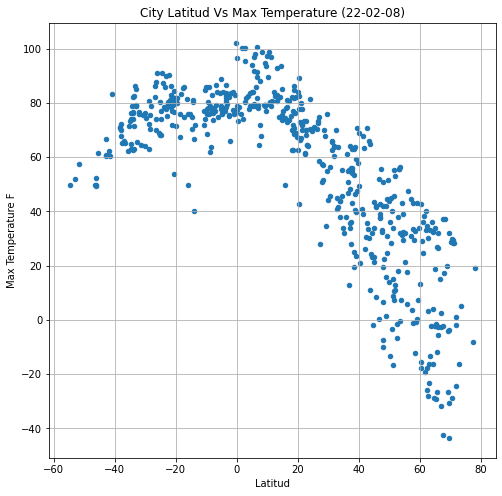

In [67]:
#PLOTTING DATA
#Latitude vs. Temperature Plot
weather_reduced.plot(kind="scatter", x="lat", y="Max Temp", grid=True, figsize=(8,8),
              title="City Latitud Vs Max Temperature (22-02-08)")

plt.xlabel("Latitud")
plt.ylabel("Max Temperature F")
plt.savefig("../Output_data/LatMaxTemp.png")
plt.show()



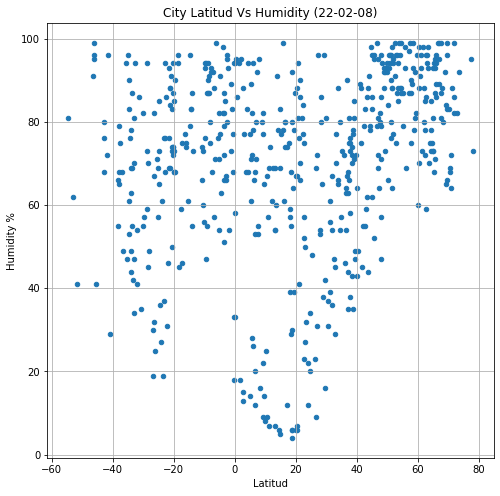

In [68]:
#Latitude vs. Humidity Plot
weather_reduced.plot(kind="scatter", x="lat", y="Humidity", grid=True, figsize=(8,8),
              title="City Latitud Vs Humidity (22-02-08)")

plt.xlabel("Latitud")
plt.ylabel("Humidity %")
plt.savefig("../Output_data/LatHumidity.png")
plt.show()

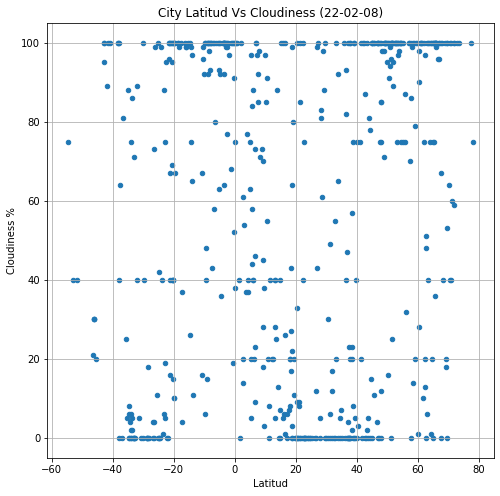

In [69]:
#Latitude vs. Cloudiness Plot
weather_reduced.plot(kind="scatter", x="lat", y="Cloudiness", grid=True, figsize=(8,8),
              title="City Latitud Vs Cloudiness (22-02-08)")

plt.xlabel("Latitud")
plt.ylabel("Cloudiness %")
plt.savefig("../Output_data/LatCloudiness.png")
plt.show()

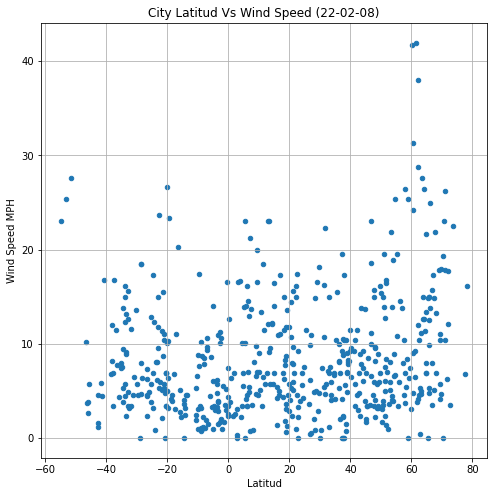

In [70]:
#Latitude vs. Wind Speed Plot
weather_reduced.plot(kind="scatter", x="lat", y="Wind Speed", grid=True, figsize=(8,8),
              title="City Latitud Vs Wind Speed (22-02-08)")

plt.xlabel("Latitud")
plt.ylabel("Wind Speed MPH")
plt.savefig("../Output_data/LatWindSpeed.png")
plt.show()

In [71]:
#LINEAR REGRESSION
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
weather_northern=weather_reduced[weather_reduced.lat >0].reset_index(drop=True)
weather_northern

In [52]:
weather_southern=weather_reduced[weather_reduced.lat <0].reset_index(drop=True)
weather_southern


,City,Country,lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Time Date
0,Atuona,PF,-9.8000,-139.0333,77.77,76,6,17.43,1644330310,70-01-01
1,Kruisfontein,ZA,-34.0033,24.7314,73.89,44,2,12.26,1644330337,70-01-01
2,Coquimbo,CL,-29.9533,-71.3436,64.13,82,100,5.75,1644330119,70-01-01
3,Cape Town,ZA,-33.9258,18.4232,82.27,49,0,14.97,1644330095,70-01-01
4,Coolum Beach,AU,-26.5333,153.1000,70.11,82,0,7.34,1644330339,70-01-01
...,...,...,...,...,...,...,...,...,...,...
176,Urubichá,BO,-15.3833,-62.9500,75.69,61,100,2.21,1644330518,70-01-01
177,Uruaçu,BR,-14.5247,-49.1408,70.16,96,100,3.65,1644330521,70-01-01
178,Maués,BR,-3.3836,-57.7186,83.48,72,100,3.87,1644330524,70-01-01
179,Neiafu,TO,-18.6500,-173.9833,75.88,94,100,4.61,1644330524,70-01-01


The r-value is: -0.8557557003966302


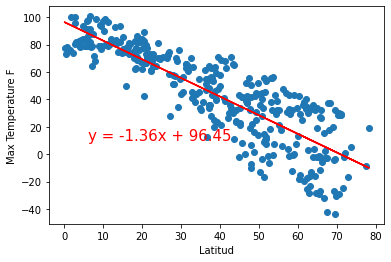

In [54]:
#LINEAR REGRESSION NORTHERN HEMISPHERE
x_values = weather_northern["lat"]
y_values = weather_northern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Max Temperature F')
print(f"The r-value is: {rvalue}")
plt.show()


The r-value is: 0.49770859246766325


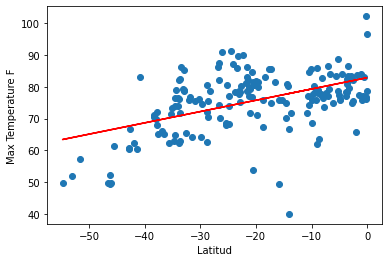

In [55]:
#LINEAR REGRESSION SOUTHERN HEMISPHERE
x_values = weather_southern["lat"]
y_values = weather_southern["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Max Temperature F')
print(f"The r-value is: {rvalue}")
plt.show()



The r-value is: 0.4872714029690906


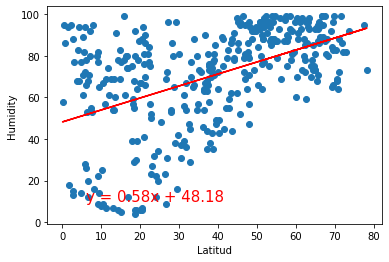

In [56]:
 #Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = weather_northern["lat"]
y_values = weather_northern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()


The r-value is: 0.1735208338165616


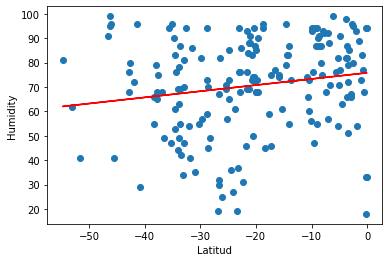

In [57]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = weather_southern["lat"]
y_values = weather_southern["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()


The r-value is: 0.3339018391467644


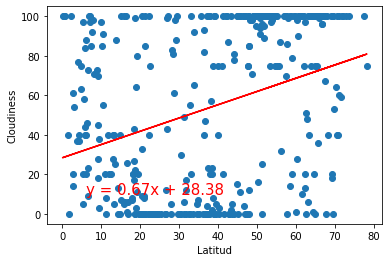

In [58]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = weather_northern["lat"]
y_values = weather_northern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()


The r-value is: 0.4299984633634391


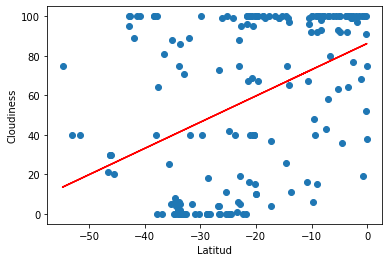

In [59]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = weather_southern["lat"]
y_values = weather_southern["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()


The r-value is: 0.21336378101074863


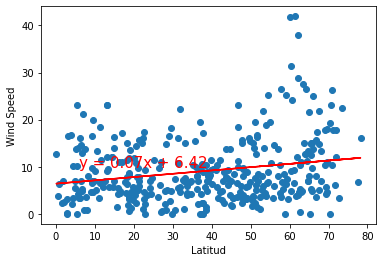

In [60]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = weather_northern["lat"]
y_values = weather_northern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()


The r-value is: -0.30647475554386416


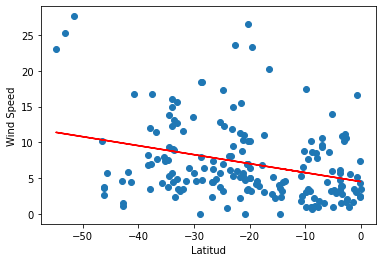

In [61]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = weather_southern["lat"]
y_values = weather_southern["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitud')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.show()
